<h1 align='center'> Genomes & Genetics </h1>
<h4 align='center'> Predict The Genetic Disorders </h4>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

### **Introduction**

Genetic disorders occur when a problem in the baby’s chromosomes or genes causes physical abnormalities or illnesses.

In our body, we have millions of cells. In each cell, there are 46 chromosomes, found in 23 matching pairs. Half of the chromosomes are passed on from a person’s mother, and half from their father. These chromosomes carry our DNA, or genes, which are the instructions for how we look and how our body develops and functions. These instructions range from our eye color to our risk for disease.

When a harmful change occurs in these instructions, it can change the way a baby develops. Babies with genetic disorders can be at risk of slow mental and physical development, physical abnormalities, and lifelong illnesses.

Some genetic disorders are hereditary, meaning the genetic change is passed on from their parents. Other genetic changes can happen for the first time in the baby. Parents can carry a change in a gene or a chromosome without realizing it, as it may not cause them any health problems.

> ### Risk Factors for Genetic Disorders
Factors that increase your risk of having a baby with a genetic disorder include:
- Family history of a genetic disorder.
- Prior child with a genetic disorder.
- One parent has a chromosomal abnormality.
- Advanced maternal age (35 or older).
- Advanced paternal age (40 or older).
- Multiple miscarriages or prior stillbirth.
- Prenatal exposure to Drugs, Alcohol, or other Environmental Factors.

**Reference**: https://women.texaschildrens.org/program/high-risk-pregnancy-care/conditions/genetic-disorders

In [9]:
# Import Dependencies -To see the graphs in the notebook.
%matplotlib inline

# Python Imports
import math,time,random,datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization -This is where the graphs come in.
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
plt.style.use('ggplot')

## Statistical Analysis
from scipy import stats
from scipy.stats import norm,skew

# Display all Columns
pd.set_option('display.max_columns', None)

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Loading the required Data

> I have kept my data in a folder called "dataset".

In [10]:
# Import the train and test data.
train = pd.read_csv('/content/drive/MyDrive/Genetic_Disorder/dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Genetic_Disorder/dataset/test.csv')

## 2. Feature Engineering

> *The features you use influence more than everything else the result. No algorithm alone, to my knowledge, can supplement the information gain given by correct feature engineering.*
— Luca Massaron

**Refer**: https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114

##### 1. Target Variables

In [11]:
## Understanding the Division of Genetic Disorders.
table1 = pd.pivot_table(train, index= ['Genetic Disorder', 'Disorder Subclass'], values= 'Patient Age', aggfunc= np.mean)
table1

Patient Age
Genetic Disorder                             Disorder Subclass                               
Mitochondrial genetic inheritance disorders  Leber's hereditary optic neuropathy     6.748644
                                             Leigh syndrome                          6.946026
                                             Mitochondrial myopathy                  6.955514
Multifactorial genetic inheritance disorders Alzheimer's                             6.358779
                                             Cancer                                  7.616279
                                             Diabetes                                6.907623
Single-gene inheritance diseases             Cystic fibrosis                         6.925110
                                             Hemochromatosis                         6.856771
                                             Tay-Sachs                               7.096241

- From the above Pivot Table we understand two things:-
  
  1. The different Disorders for each Genetic Disorder.
  2. The Average Age of Patients for each Genetic Disorder is ~ 7.

In [12]:
# This loop assign these values to the Missing Values according to the Disorder Subclass.
for i in range(0,22083):
    if (train['Genetic Disorder'].isnull()[i] == True):
        if (train['Disorder Subclass'][i] == "Leber's hereditary optic neuropathy"):
          train['Genetic Disorder'][i] = 'Mitochondrial genetic inheritance disorders'
        elif (train['Disorder Subclass'][i] == 'Leigh syndrome'):
          train['Genetic Disorder'][i] = 'Mitochondrial genetic inheritance disorders'
        elif (train['Disorder Subclass'][i] == 'Mitochondrial myopathy'):
          train['Genetic Disorder'][i] = 'Mitochondrial genetic inheritance disorders'
        elif (train['Disorder Subclass'][i] == "Alzheimer's"):
          train['Genetic Disorder'][i] = 'Multifactorial genetic inheritance disorders'
        elif (train['Disorder Subclass'][i] == 'Cancer'):
          train['Genetic Disorder'][i] = 'Multifactorial genetic inheritance disorders'
        elif (train['Disorder Subclass'][i] == 'Diabetes'):
          train['Genetic Disorder'][i] = 'Multifactorial genetic inheritance disorders'
        elif (train['Disorder Subclass'][i] == "Cystic fibrosis"):
          train['Genetic Disorder'][i] = 'Single-gene inheritance diseases'
        elif (train['Disorder Subclass'][i] == 'Hemochromatosis'):
          train['Genetic Disorder'][i] = 'Single-gene inheritance diseases'
        elif (train['Disorder Subclass'][i] == 'Tay-Sachs'):
          train['Genetic Disorder'][i] = 'Single-gene inheritance diseases'
        else:
          pass
    else:
      continue

- We now need to understand which Disorder Subclass is frequently occuring for each Genetic Disorder.

In [13]:
## Understanding the Division of Genetic Disorders.
table2 = pd.pivot_table(train, index= ['Genetic Disorder', 'Disorder Subclass'], values= 'Patient Id', aggfunc= 'count')
table2

Patient Id
Genetic Disorder                             Disorder Subclass                              
Mitochondrial genetic inheritance disorders  Leber's hereditary optic neuropathy         648
                                             Leigh syndrome                             5160
                                             Mitochondrial myopathy                     4405
Multifactorial genetic inheritance disorders Alzheimer's                                 152
                                             Cancer                                       97
                                             Diabetes                                   1817
Single-gene inheritance diseases             Cystic fibrosis                            3448
                                             Hemochromatosis                            1355
                                             Tay-Sachs                                  2833

In [14]:
# This loop assign these values to the Missing Values according to the Most Frequent Disorder Subclass for each Genetic Disorder.
for i in range(0,22083):
    if (train['Disorder Subclass'].isnull()[i] == True):
        if (train['Genetic Disorder'][i] == "Mitochondrial genetic inheritance disorders"):
          train['Disorder Subclass'][i] = 'Leigh syndrome'
        elif (train['Genetic Disorder'][i] == "Multifactorial genetic inheritance disorders"):
          train['Disorder Subclass'][i] = 'Diabetes'
        elif (train['Genetic Disorder'][i] == "Single-gene inheritance diseases"):
          train['Disorder Subclass'][i] = 'Cystic fibrosis'
        else:
          pass
    else:
      continue

In [15]:
print(f'The Missing Values in Disorder Subclass Column is: {train["Disorder Subclass"].isnull().sum()}')
print(f'The Missing Values in Genetic Disorder Column is: {train["Genetic Disorder"].isnull().sum()}')

The Missing Values in Disorder Subclass Column is: 278
The Missing Values in Genetic Disorder Column is: 278


In [16]:
## Dropping the Missing Values from the Target Variables.
train.dropna(subset=['Genetic Disorder', "Disorder Subclass"], inplace= True)

In [17]:
train.shape

(21805, 45)

##### 2. Explanatory Variables

In [18]:
## Proper Indexing
train.insert(0, '', range(0, 0 + len(train)))
train.set_index('', inplace= True)

In [19]:
## Dropping all Unnecessary Columns
train.drop(columns= ['Patient Id', 'Place of birth', 'H/O serious maternal illness', 'Patient First Name', 'Family Name', "Father's name",
                     'Institute Name', 'Location of Institute'], inplace= True)

test.drop(columns= ['Patient Id', 'Place of birth', 'H/O serious maternal illness', 'Patient First Name', 'Family Name', "Father's name",
                     'Institute Name', 'Location of Institute'], inplace= True)

In [20]:
train.shape

(21805, 37)

###### Patient Age

In [21]:
train['Patient Age'].describe()

,Patient Age
count,20397.000000
mean,6.972349
std,4.317753
min,0.000000
25%,3.000000
50%,7.000000
75%,11.000000
max,14.000000


In [22]:
## Filling the Missing Values with the Average Mean.
train['Patient Age'].fillna(round(train['Patient Age'].mean()), inplace= True)

In [23]:
## Missing Values
train['Patient Age'].isnull().any()

False

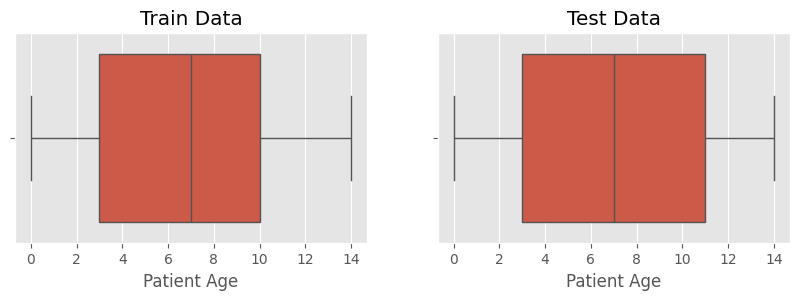

In [24]:
## Checking for Outliers
plt.figure(figsize= (10,6))

plt.subplot(2,2,1)
sns.boxplot(x= 'Patient Age', data= train)
plt.title('Train Data')
plt.subplot(2,2,2)
sns.boxplot(x= 'Patient Age', data= test)
plt.title('Test Data')

plt.show()

###### Inherited from Father

In [25]:
train['Inherited from father'].unique()

array(['No', 'Yes', nan], dtype=object)

In [26]:
## Filling Missing Values with 'No'
#### train['Inherited from father'].fillna('No', inplace= True)
#### test['Inherited from father'].fillna('No', inplace= True)

### Train Data
for i in range(0,21805):
    if (train['Inherited from father'].isnull()[i] == True):
        if (train['Paternal gene'][i] == "Yes"):
          train['Inherited from father'][i] = 'Yes'
        elif (train['Paternal gene'][i] == "No"):
          train['Inherited from father'][i] = 'No'
        else:
          train['Inherited from father'][i] = 'No'
    else:
      continue


### Test Data
for i in range(0,9465):
    if (test['Inherited from father'].isnull()[i] == True):
        if (test['Paternal gene'][i] == "Yes"):
          test['Inherited from father'][i] = 'Yes'
        elif (test['Paternal gene'][i] == "No"):
          test['Inherited from father'][i] = 'No'
        else:
          test['Inherited from father'][i] = 'No'
    else:
      continue

In [27]:
train['Inherited from father'].value_counts()

,count
Inherited from father,
No,13122
Yes,8683


###### Maternal Gene

In [28]:
train['Maternal gene'].unique()

array(['Yes', 'No', nan], dtype=object)

In [29]:
## Filling Missing Values with 'No'
## train['Maternal gene'].fillna('No', inplace= True)
## test['Maternal gene'].fillna('No', inplace= True)

### Train Data
for i in range(0,21805):
    if (train['Maternal gene'].isnull()[i] == True):
        if (train["Genes in mother's side"][i] == "Yes"):
          train['Maternal gene'][i] = 'Yes'
        elif (train["Genes in mother's side"][i] == "No"):
          train['Maternal gene'][i] = 'No'
        else:
          train['Maternal gene'][i] = 'No'
    else:
      continue


### Test Data
for i in range(0,9465):
    if (test['Maternal gene'].isnull()[i] == True):
        if (test["Genes in mother's side"][i] == "Yes"):
          test['Maternal gene'][i] = 'Yes'
        elif (test["Genes in mother's side"][i] == "No"):
          test['Maternal gene'][i] = 'No'
        else:
          test['Maternal gene'][i] = 'No'
    else:
      continue

In [30]:
train['Maternal gene'].value_counts()

,count
Maternal gene,
Yes,12174
No,9631


###### Blood cell count (mcL)

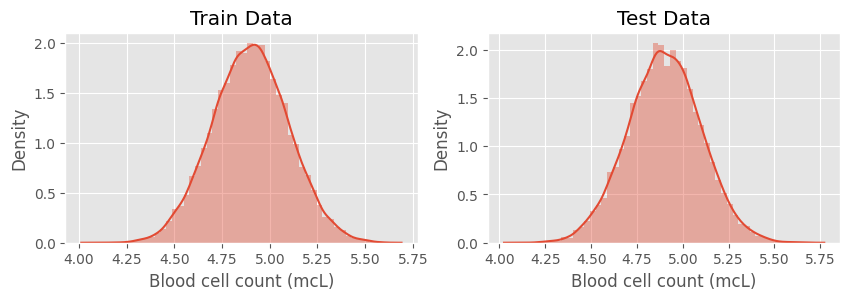

In [31]:
## Checking the Distribution
plt.figure(figsize= (10,6))

plt.subplot(2,2,1)
sns.distplot(train['Blood cell count (mcL)'])
plt.title('Train Data')
plt.subplot(2,2,2)
sns.distplot(test['Blood cell count (mcL)'])
plt.title('Test Data')

plt.show()

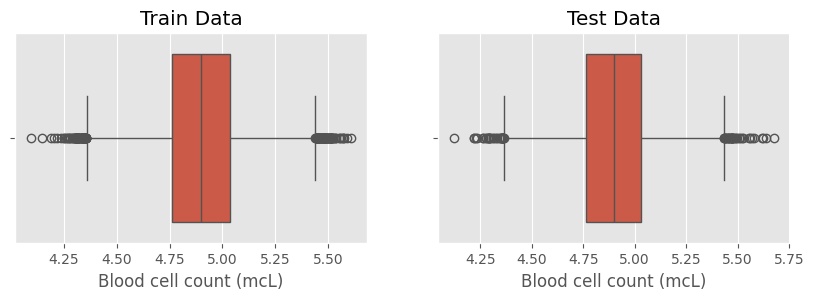

In [32]:
## Checking for Outliers
plt.figure(figsize= (10,6))

plt.subplot(2,2,1)
sns.boxplot(x= 'Blood cell count (mcL)', data= train)
plt.title('Train Data')
plt.subplot(2,2,2)
sns.boxplot(x= 'Blood cell count (mcL)', data= test)
plt.title('Test Data')

plt.show()

In [34]:
## Z-Score --> When Feature follows Normal Distibution.

### Train Dataset
mean = train['Blood cell count (mcL)'].mean()
std = train['Blood cell count (mcL)'].std()

Upper_Bound = mean + (3*std)
Lower_Bound = mean - (3*std)

train['Blood cell count (mcL)'][train['Blood cell count (mcL)'] < Lower_Bound] = Lower_Bound
train['Blood cell count (mcL)'][train['Blood cell count (mcL)'] > Upper_Bound] = Upper_Bound




### Test Dataset
mean = test['Blood cell count (mcL)'].mean()
std = test['Blood cell count (mcL)'].std()

Upper_Bound = mean + (3*std)
Lower_Bound = mean - (3*std)

test['Blood cell count (mcL)'][test['Blood cell count (mcL)'] < Lower_Bound] = Lower_Bound
test['Blood cell count (mcL)'][test['Blood cell count (mcL)'] > Upper_Bound] = Upper_Bound

###### Mother's Age  && Father's Age

In [35]:
## Filling the Missing Values with the Average Mean.
train["Mother's age"].fillna(round(train["Mother's age"].mean()), inplace= True)

## Filling the Missing Values with the Average Mean.
train["Father's age"].fillna(round(train["Father's age"].mean()), inplace= True)

###### Respiratory Rate (breaths/min)

In [36]:
## Filling Missing Values with 'Normal (30-60)'
## train['Respiratory Rate (breaths/min)'].fillna('Normal (30-60)', inplace= True)
test['Respiratory Rate (breaths/min)'].replace('-99', np.nan, inplace= True)
## test['Respiratory Rate (breaths/min)'].fillna('Normal (30-60)', inplace= True)


### Train Data
for i in range(0,21805):
    if (train['Respiratory Rate (breaths/min)'].isnull()[i] == True):
        if (train["Status"][i] == "Alive"):
          train['Respiratory Rate (breaths/min)'][i] = 'Normal (30-60)'
        else:
          train['Respiratory Rate (breaths/min)'][i] = 'Tachypnea'
    else:
      continue


### Test Data
for i in range(0,9465):
    if (test['Respiratory Rate (breaths/min)'].isnull()[i] == True):
        if (test["Status"][i] == "Alive"):
          test['Respiratory Rate (breaths/min)'][i] = 'Normal (30-60)'
        else:
          test['Respiratory Rate (breaths/min)'][i] = 'Tachypnea'
    else:
      continue

In [37]:
train['Respiratory Rate (breaths/min)'].value_counts()

,count
Respiratory Rate (breaths/min),
Normal (30-60),10991
Tachypnea,10814


###### Heart Rate (rates/min

In [38]:
## Filling Missing Values with 'Normal'
## train['Heart Rate (rates/min'].fillna('Normal', inplace= True)
test['Heart Rate (rates/min'].replace('-99', np.nan, inplace= True)
## test['Heart Rate (rates/min'].fillna('Normal', inplace= True)


### Train Data
for i in range(0,21805):
    if (train['Heart Rate (rates/min'].isnull()[i] == True):
        if (train["Respiratory Rate (breaths/min)"][i] == "Normal (30-60)"):
          train['Heart Rate (rates/min'][i] = 'Normal'
        else:
          train['Heart Rate (rates/min'][i] = 'Tachycardia'
    else:
      continue


### Test Data
for i in range(0,9465):
    if (test['Heart Rate (rates/min'].isnull()[i] == True):
        if (test["Respiratory Rate (breaths/min)"][i] == "Normal (30-60)"):
          test['Heart Rate (rates/min'][i] = 'Normal'
        else:
          test['Heart Rate (rates/min'][i] = 'Tachycardia'
    else:
      continue

In [39]:
train['Heart Rate (rates/min'].value_counts()

,count
Heart Rate (rates/min,
Normal,11156
Tachycardia,10649


###### Test 1 - Test 5

In [40]:
train.drop(columns= ['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5'], inplace= True)
test.drop(columns= ['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5'], inplace= True)

###### Parental Consent

In [41]:
## Filling Missing Values with 'No'
train['Parental consent'].fillna('No', inplace= True)
test['Parental consent'].replace('-99', np.nan, inplace= True)
test['Parental consent'].fillna('No', inplace= True)

In [42]:
train['Parental consent'].value_counts()

,count
Parental consent,
Yes,19719
No,2086


###### Follow-up

In [43]:
# This loop is for Train Data.
for i in range(0,21805):
    if (train['Follow-up'].isnull()[i] == True):
        if (train['Respiratory Rate (breaths/min)'][i] == "Tachypnea"):
          train['Follow-up'][i] = 'High'
        elif (train['Heart Rate (rates/min'][i] == "Tachycardia"):
          train['Follow-up'][i] = 'High'
        else:
          train['Follow-up'][i] = 'Low'
    else:
      continue



test['Follow-up'].replace('-99', np.nan, inplace= True)
# This loop is for Test Data.
for i in range(0,9465):
    if (test['Follow-up'].isnull()[i] == True):
        if (test['Respiratory Rate (breaths/min)'][i] == "Tachypnea"):
          test['Follow-up'][i] = 'High'
        elif (test['Heart Rate (rates/min'][i] == "Tachycardia"):
          test['Follow-up'][i] = 'High'
        else:
          test['Follow-up'][i] = 'Low'
    else:
      continue

In [44]:
train['Follow-up'].value_counts()

,count
Follow-up,
High,11248
Low,10557


###### Gender

In [45]:
train["Gender"].mode()

,Gender
0,Ambiguous


In [46]:
## Filling Missing Values with 'Ambiguous'
train['Gender'].fillna('Ambiguous', inplace= True)
test['Gender'].replace('-99', np.nan, inplace= True)
test['Gender'].fillna('Ambiguous', inplace= True)

###### Birth asphyxia

In [47]:
### Train Data
train["Birth asphyxia"].replace('No record', 'Not available', inplace= True)
train["Birth asphyxia"].fillna('No', inplace= True)


### Test Data
test["Birth asphyxia"].replace('No record', 'Not available', inplace= True)
test["Birth asphyxia"].replace('-99', np.nan, inplace= True)
test["Birth asphyxia"].fillna('No', inplace= True)

###### Autopsy shows birth defect (if applicable)

In [48]:
### Train Data
train["Autopsy shows birth defect (if applicable)"].replace('None', 'No', inplace= True)

for i in range(0,21805):
    if (train["Autopsy shows birth defect (if applicable)"].isnull()[i] == True):
        if (train['Inherited from father'][i] == "Yes"):
          train["Autopsy shows birth defect (if applicable)"][i] = 'Yes'
        else:
          train["Autopsy shows birth defect (if applicable)"][i] = 'No'
    else:
      continue



### Test Data
test["Autopsy shows birth defect (if applicable)"].replace('-99', np.nan, inplace= True)
test["Autopsy shows birth defect (if applicable)"].replace('None', 'No', inplace= True)

for i in range(0,9465):
    if (test["Autopsy shows birth defect (if applicable)"].isnull()[i] == True):
        if (test['Inherited from father'][i] == "Yes"):
          test["Autopsy shows birth defect (if applicable)"][i] = 'Yes'
        else:
          test["Autopsy shows birth defect (if applicable)"][i] = 'No'
    else:
      continue

In [49]:
train["Autopsy shows birth defect (if applicable)"].value_counts()

,count
Autopsy shows birth defect (if applicable),
Not applicable,10955
No,5758
Yes,5092


###### Folic acid details (peri-conceptional)

In [50]:
train["Folic acid details (peri-conceptional)"].fillna('No', inplace= True)

test["Folic acid details (peri-conceptional)"].replace('-99', np.nan, inplace= True)
test["Folic acid details (peri-conceptional)"].fillna('No', inplace= True)

In [51]:
train["Folic acid details (peri-conceptional)"].value_counts()

,count
Folic acid details (peri-conceptional),
No,11840
Yes,9965


###### H/O radiation exposure (x-ray)

In [52]:
train["H/O radiation exposure (x-ray)"].fillna('No', inplace= True)
train["H/O radiation exposure (x-ray)"].replace('-', 'No', inplace= True)
train["H/O radiation exposure (x-ray)"].replace('Not applicable', 'No', inplace= True)


test["H/O radiation exposure (x-ray)"].replace('-99', np.nan, inplace= True)
test["H/O radiation exposure (x-ray)"].fillna('No', inplace= True)
test["H/O radiation exposure (x-ray)"].replace('-', 'No', inplace= True)
test["H/O radiation exposure (x-ray)"].replace('Not applicable', 'No', inplace= True)

In [53]:
train["H/O radiation exposure (x-ray)"].value_counts()

,count
H/O radiation exposure (x-ray),
No,16881
Yes,4924


###### H/O substance abuse

In [54]:
train["H/O substance abuse"].fillna('No', inplace= True)
train["H/O substance abuse"].replace('-', 'No', inplace= True)
train["H/O substance abuse"].replace('Not applicable', 'No', inplace= True)


test["H/O substance abuse"].replace('-99', np.nan, inplace= True)
test["H/O substance abuse"].fillna('No', inplace= True)
test["H/O substance abuse"].replace('-', 'No', inplace= True)
test["H/O substance abuse"].replace('Not applicable', 'No', inplace= True)

In [55]:
train["H/O substance abuse"].value_counts()

,count
H/O substance abuse,
No,16891
Yes,4914


###### Assisted conception IVF/ART

In [56]:
test["Assisted conception IVF/ART"].replace('-99', np.nan, inplace= True)

# This loop is for test Data.
for i in range(0,21805):
    if (train['Assisted conception IVF/ART'].isnull()[i] == True):
        if (train['Folic acid details (peri-conceptional)'][i] == "Yes"):
          train['Assisted conception IVF/ART'][i] = 'Yes'
        else:
          train['Assisted conception IVF/ART'][i] = 'No'
    else:
      continue



# This loop is for Test Data.
for i in range(0,9465):
    if (test['Assisted conception IVF/ART'].isnull()[i] == True):
        if (test['Folic acid details (peri-conceptional)'][i] == "Yes"):
          test['Assisted conception IVF/ART'][i] = 'Yes'
        else:
          test['Assisted conception IVF/ART'][i] = 'No'
    else:
      continue

In [57]:
train["Assisted conception IVF/ART"].value_counts()

,count
Assisted conception IVF/ART,
No,10969
Yes,10836


###### History of Anomalies

In [58]:
train["History of anomalies in previous pregnancies"].fillna('No', inplace= True)

test["History of anomalies in previous pregnancies"].replace('-99', np.nan, inplace= True)
test["History of anomalies in previous pregnancies"].fillna('No', inplace= True)

###### No. of previous abortion

In [59]:
train["No. of previous abortion"].fillna(0, inplace= True)

test["No. of previous abortion"].replace(-99, 0, inplace= True)

###### Birth Defects

**Refer**: https://www.cdc.gov/ncbddd/birthdefects/facts.html

In [61]:
test["Birth defects"].replace('-99', np.nan, inplace= True)

# This loop is for test Data.
for i in range(0,21805):
    if (train['Birth defects'].isnull()[i] == True):
        if (train["Mother's age"][i] > 34):
          if (train["H/O substance abuse"][i] == 'Yes'):
            train['Birth defects'][i] = 'Multiple'
          else:
            train['Birth defects'][i] = 'Singular'
        else:
            train['Birth defects'][i] = 'Singular'
    else:
      continue



# This loop is for Test Data.
for i in range(0,9465):
    if (test['Birth defects'].isnull()[i] == True):
        if (test["Mother's age"][i] > 34):
          if (test["H/O substance abuse"][i] == 'Yes'):
            test['Birth defects'][i] = 'Multiple'
          else:
            test['Birth defects'][i] = 'Singular'
        else:
            test['Birth defects'][i] = 'Singular'
    else:
      continue

In [62]:
train["Birth defects"].value_counts()

,count
Birth defects,
Singular,11647
Multiple,10158


###### White Blood cell count (thousand per microliter)

In [63]:
train["White Blood cell count (thousand per microliter)"].fillna(train["White Blood cell count (thousand per microliter)"].mean(), inplace= True)

test["White Blood cell count (thousand per microliter)"].replace(-99, np.nan, inplace= True)
test["White Blood cell count (thousand per microliter)"].fillna(test["White Blood cell count (thousand per microliter)"].mean(), inplace= True)

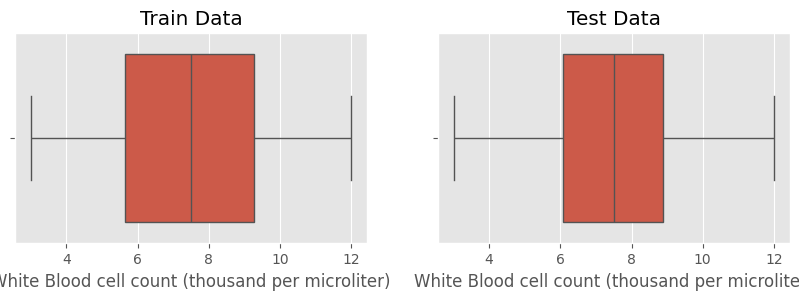

In [64]:
## Checking for Outliers
plt.figure(figsize= (10,6))

plt.subplot(2,2,1)
sns.boxplot(x= 'White Blood cell count (thousand per microliter)', data= train)
plt.title('Train Data')
plt.subplot(2,2,2)
sns.boxplot(x= 'White Blood cell count (thousand per microliter)', data= test)
plt.title('Test Data')

plt.show()

###### Blood test result

**Refer**: https://childrensoncologygroup.org/lowwhitebloodcellcount

In [65]:
## Understanding the Division of Genetic Disorders.
table3 = pd.pivot_table(train, index= ['Blood test result'],
                        values= 'White Blood cell count (thousand per microliter)', aggfunc= np.mean)
table3

,White Blood cell count (thousand per microliter)
Blood test result,
abnormal,7.462121
inconclusive,7.482236
normal,7.502300
slightly abnormal,7.499233


In [66]:
## train["Blood test result"].fillna('slightly abnormal', inplace= True)
## test["Blood test result"].fillna('slightly abnormal', inplace= True)

test["Blood test result"].replace('-99', np.nan, inplace= True)

# This loop is for test Data.
for i in range(0,21805):
    if (train['Blood test result'].isnull()[i] == True):
        if (5 < train["White Blood cell count (thousand per microliter)"][i] < 10):
          train['Blood test result'][i] = 'normal'
        elif (10 < train["White Blood cell count (thousand per microliter)"][i] < 1):
          train['Blood test result'][i] = 'abnormal'
        elif (1 < train["White Blood cell count (thousand per microliter)"][i] > 4):
          train['Blood test result'][i] = 'slightly abnormal'
        else:
            train['Blood test result'][i] = 'inconclusive'
    else:
      continue



# This loop is for Test Data.
for i in range(0,9465):
    if (test['Blood test result'].isnull()[i] == True):
        if (5 < test["White Blood cell count (thousand per microliter)"][i] < 10):
          test['Blood test result'][i] = 'normal'
        elif (10 < test["White Blood cell count (thousand per microliter)"][i] < 1):
          test['Blood test result'][i] = 'abnormal'
        elif (1 < test["White Blood cell count (thousand per microliter)"][i] > 4):
          test['Blood test result'][i] = 'slightly abnormal'
        else:
            test['Blood test result'][i] = 'inconclusive'
    else:
      continue

In [67]:
train["Blood test result"].value_counts()

,count
Blood test result,
normal,6298
slightly abnormal,5562
inconclusive,5104
abnormal,4841


###### Symptom 1- Symptom 5

In [68]:
train["Symptom 1"].fillna(0, inplace= True)
train["Symptom 2"].fillna(0, inplace= True)
train["Symptom 3"].fillna(0, inplace= True)
train["Symptom 4"].fillna(0, inplace= True)
train["Symptom 5"].fillna(0, inplace= True)


## Replacing Boolean values
test["Symptom 1"] = np.where(test["Symptom 1"] == True, 1, 0)
test["Symptom 2"] = np.where(test["Symptom 2"] == True, 1, 0)
test["Symptom 3"] = np.where(test["Symptom 3"] == True, 1, 0)
test["Symptom 4"] = np.where(test["Symptom 4"] == True, 1, 0)
test["Symptom 5"] = np.where(test["Symptom 5"] == True, 1, 0)

### Feature Encoding

In [69]:
train.head(25)

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.0,Yes,No,Yes,No,4.760603,35.0,42.0,Alive,Normal (30-60),Normal,Yes,High,Ambiguous,No,Not applicable,No,No,No,No,Yes,0.0,Singular,9.857562,normal,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,Yes,Yes,No,No,4.910669,35.0,23.0,Deceased,Tachypnea,Normal,Yes,High,Ambiguous,No,Yes,Yes,No,No,No,Yes,0.0,Multiple,5.522560,normal,1.0,0.0,1.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),Tachycardia,Yes,Low,Ambiguous,Not available,Not applicable,Yes,Yes,No,Yes,Yes,4.0,Singular,7.488293,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.0,42.0,Deceased,Tachypnea,Normal,Yes,High,Male,Not available,No,No,No,No,No,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,Yes,Yes,4.720703,32.0,42.0,Alive,Tachypnea,Tachycardia,No,Low,Male,Not available,Not applicable,No,No,No,Yes,No,4.0,Multiple,4.098210,slightly abnormal,0.0,0.0,0.0,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer
5,14.0,Yes,No,Yes,No,5.103188,35.0,42.0,Deceased,Tachypnea,Normal,Yes,Low,Female,Not available,No,No,No,No,No,No,0.0,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
6,3.0,Yes,No,Yes,Yes,4.901080,35.0,63.0,Alive,Normal (30-60),Normal,No,Low,Male,Not available,Not applicable,No,No,No,Yes,No,3.0,Multiple,6.825974,normal,0.0,0.0,0.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs
7,3.0,No,No,Yes,Yes,4.964816,40.0,42.0,Alive,Tachypnea,Normal,Yes,Low,Ambiguous,Not available,Not applicable,Yes,No,No,No,Yes,1.0,Singular,9.836352,inconclusive,0.0,0.0,1.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs
8,11.0,No,No,Yes,No,5.209058,45.0,44.0,Alive,Tachypnea,Tachycardia,Yes,Low,Male,Yes,Not applicable,Yes,No,No,No,Yes,0.0,Multiple,6.669552,slightly abnormal,1.0,1.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome


In [70]:
# Obtaining the Categorical Columns
categorical_features = [features for features in train.columns if train[features].dtypes == 'O']
categorical_features

["Genes in mother's side",
 'Inherited from father',
 'Maternal gene',
 'Paternal gene',
 'Status',
 'Respiratory Rate (breaths/min)',
 'Heart Rate (rates/min',
 'Parental consent',
 'Follow-up',
 'Gender',
 'Birth asphyxia',
 'Autopsy shows birth defect (if applicable)',
 'Folic acid details (peri-conceptional)',
 'H/O radiation exposure (x-ray)',
 'H/O substance abuse',
 'Assisted conception IVF/ART',
 'History of anomalies in previous pregnancies',
 'Birth defects',
 'Blood test result',
 'Genetic Disorder',
 'Disorder Subclass']

In [71]:
# Obtaining the Categorical Columns
categorical_features_test = [features for features in test.columns if test[features].dtypes == 'O']

In [72]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

label_encoder = LabelEncoder()
for feature in categorical_features:
    ## Encode labels in all Categorical Columns.
    train[feature]= label_encoder.fit_transform(train[feature])



for features in categorical_features_test:
    ## Encode labels in all Categorical Columns.
    test[features]= label_encoder.fit_transform(test[features])

In [73]:
train.head(25)

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.0,1,0,1,0,4.760603,35.0,42.0,0,0,0,1,0,0,0,1,0,0,0,0,1,0.0,1,9.857562,2,1.0,1.0,1.0,1.0,1.0,0,5
1,4.0,1,1,0,0,4.910669,35.0,23.0,1,1,0,1,0,0,0,2,1,0,0,0,1,0.0,0,5.522560,2,1.0,0.0,1.0,1.0,0.0,2,2
2,6.0,1,0,0,0,4.893297,41.0,22.0,0,0,1,1,1,0,1,1,1,1,0,1,1,4.0,1,7.488293,2,0.0,1.0,1.0,1.0,1.0,1,3
3,12.0,1,0,1,0,4.705280,21.0,42.0,1,1,0,1,0,2,1,0,0,0,0,0,1,1.0,1,7.919321,1,0.0,0.0,1.0,0.0,0.0,0,6
4,11.0,1,0,1,1,4.720703,32.0,42.0,0,1,1,0,1,2,1,1,0,0,0,1,0,4.0,0,4.098210,3,0.0,0.0,0.0,0.0,0.0,1,1
5,14.0,1,0,1,0,5.103188,35.0,42.0,1,1,0,1,1,1,1,0,0,0,0,0,0,0.0,0,10.272230,2,1.0,0.0,0.0,1.0,0.0,2,2
6,3.0,1,0,1,1,4.901080,35.0,63.0,0,0,0,0,1,2,1,1,0,0,0,1,0,3.0,0,6.825974,2,0.0,0.0,0.0,0.0,0.0,2,8
7,3.0,0,0,1,1,4.964816,40.0,42.0,0,1,0,1,1,0,1,1,1,0,0,0,1,1.0,1,9.836352,1,0.0,0.0,1.0,0.0,0.0,2,8
8,11.0,0,0,1,0,5.209058,45.0,44.0,0,1,1,1,1,2,2,1,1,0,0,0,1,0.0,0,6.669552,3,1.0,1.0,1.0,0.0,1.0,0,6


### Feature Scaling

In [74]:
# Obtaining Numerical Columns
numerical_features = [features for features in train.columns if train[features].dtypes != 'O']
numerical_features

['Patient Age',
 "Genes in mother's side",
 'Inherited from father',
 'Maternal gene',
 'Paternal gene',
 'Blood cell count (mcL)',
 "Mother's age",
 "Father's age",
 'Status',
 'Respiratory Rate (breaths/min)',
 'Heart Rate (rates/min',
 'Parental consent',
 'Follow-up',
 'Gender',
 'Birth asphyxia',
 'Autopsy shows birth defect (if applicable)',
 'Folic acid details (peri-conceptional)',
 'H/O radiation exposure (x-ray)',
 'H/O substance abuse',
 'Assisted conception IVF/ART',
 'History of anomalies in previous pregnancies',
 'No. of previous abortion',
 'Birth defects',
 'White Blood cell count (thousand per microliter)',
 'Blood test result',
 'Symptom 1',
 'Symptom 2',
 'Symptom 3',
 'Symptom 4',
 'Symptom 5',
 'Genetic Disorder',
 'Disorder Subclass']

In [75]:
# Selecting all Features that need to be Scaled except the Target Variable.
scale_feature = [features for features in numerical_features if features not in ['Genetic Disorder', 'Disorder Subclass', "Genes in mother's side",
                                                                                 'Inherited from father', 'Maternal gene', 'Paternal gene',
                                                                                 'Status', 'Respiratory Rate (breaths/min)',
                                                                                 'Heart Rate (rates/min', 'Parental consent', 'Follow-up',
                                                                                 'Gender', 'Birth asphyxia',
                                                                                 'Autopsy shows birth defect (if applicable)',
                                                                                 'Folic acid details (peri-conceptional)',
                                                                                 'H/O radiation exposure (x-ray)', 'H/O substance abuse',
                                                                                 'Assisted conception IVF/ART', 'Symptom 1', 'Symptom 2',
                                                                                 'Symptom 3', 'Symptom 4', 'Symptom 5',
                                                                                 'History of anomalies in previous pregnancies',
                                                                                 'Birth defects', 'Blood test result']]

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()


# Transform the train set and add the 'Genetic Disorder', 'Disorder Subclass' Columns.
train = pd.concat([train[['Genetic Disorder', 'Disorder Subclass', "Genes in mother's side", 'Inherited from father', 'Maternal gene',
                          'Paternal gene', 'Status', 'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Parental consent', 'Follow-up',
                          'Gender', 'Birth asphyxia', 'Autopsy shows birth defect (if applicable)', 'Folic acid details (peri-conceptional)',
                          'H/O radiation exposure (x-ray)', 'H/O substance abuse', 'Assisted conception IVF/ART', 'Symptom 1', 'Symptom 2',
                          'Symptom 3', 'Symptom 4', 'Symptom 5', 'History of anomalies in previous pregnancies', 'Birth defects',
                          'Blood test result']].reset_index(drop= True),
       pd.DataFrame(scaler.fit_transform(train[scale_feature]), columns= scale_feature)], axis= 1)
       ## Converting to Dataframe as after transform its an array.

train.head()

,Genetic Disorder,Disorder Subclass,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,History of anomalies in previous pregnancies,Birth defects,Blood test result,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter)
0,0,5,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1.0,1.0,1.0,1.0,1.0,1,1,2,-0.714286,-0.511845,0.000000,0.000000,-0.666667,0.652979
1,2,2,1,1,0,0,1,1,0,1,0,0,0,2,1,0,0,0,1.0,0.0,1.0,1.0,0.0,1,0,2,-0.428571,0.042123,0.000000,-1.357143,-0.666667,-0.541763
2,1,3,1,0,0,0,0,0,1,1,1,0,1,1,1,1,0,1,0.0,1.0,1.0,1.0,1.0,1,1,2,-0.142857,-0.022004,0.545455,-1.428571,0.666667,0.000000
3,0,6,1,0,1,0,1,1,0,1,0,2,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1,1,1,0.714286,-0.716068,-1.272727,0.000000,-0.333333,0.118793
4,1,1,1,0,1,1,0,1,1,0,1,2,1,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0,3,0.571429,-0.659137,-0.272727,0.000000,0.666667,-0.934318


In [76]:
# Selecting all Features that need to be Scaled except the Target Variable.
scale_feature = [features for features in numerical_features if features not in ['Genetic Disorder', 'Disorder Subclass', "Genes in mother's side",
                                                                                 'Inherited from father', 'Maternal gene', 'Paternal gene',
                                                                                 'Status', 'Respiratory Rate (breaths/min)',
                                                                                 'Heart Rate (rates/min', 'Parental consent', 'Follow-up',
                                                                                 'Gender', 'Birth asphyxia',
                                                                                 'Autopsy shows birth defect (if applicable)',
                                                                                 'Folic acid details (peri-conceptional)',
                                                                                 'H/O radiation exposure (x-ray)', 'H/O substance abuse',
                                                                                 'Assisted conception IVF/ART', 'Symptom 1', 'Symptom 2',
                                                                                 'Symptom 3', 'Symptom 4', 'Symptom 5',
                                                                                 'History of anomalies in previous pregnancies',
                                                                                 'Birth defects', 'Blood test result']]

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()


# Transform the test set and add the remaining Column.
test = pd.concat([test[["Genes in mother's side", 'Inherited from father', 'Maternal gene',
                        'Paternal gene', 'Status', 'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Parental consent',
                        'Follow-up', 'Gender', 'Birth asphyxia', 'Autopsy shows birth defect (if applicable)',
                        'Folic acid details (peri-conceptional)', 'H/O radiation exposure (x-ray)', 'H/O substance abuse',
                        'Assisted conception IVF/ART', 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5',
                        'History of anomalies in previous pregnancies', 'Birth defects', 'Blood test result']].reset_index(drop= True),
       pd.DataFrame(scaler.fit_transform(test[scale_feature]), columns= scale_feature)], axis= 1)
       ## Converting to Dataframe as after transform its an array.

test.head()

,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,History of anomalies in previous pregnancies,Birth defects,Blood test result,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter)
0,0,1,0,0,0,1,0,0,1,2,2,1,1,1,0,0,1,1,1,1,1,0,0,3,-0.125,0.309384,0.176471,0.826087,0.333333,0.000000
1,1,0,1,1,0,0,0,1,1,2,2,1,1,0,0,0,0,0,0,1,0,1,0,2,0.375,0.822755,-0.117647,0.478261,-0.333333,0.242998
2,0,0,0,0,1,1,0,0,1,0,1,0,0,1,1,1,0,0,1,1,0,0,1,3,-0.250,-0.085089,0.764706,0.782609,-0.333333,0.000000
3,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,1,1,2,0.750,-0.789999,-0.588235,0.565217,-0.333333,-0.216795
4,0,1,0,1,1,1,1,1,1,0,0,2,1,1,0,0,1,1,1,1,0,0,0,2,-0.250,0.947969,0.352941,-0.173913,-0.333333,-0.461292


### Feature Selection

In [77]:
## Capture the Independent Variables
X = train.drop(columns= ['Genetic Disorder','Disorder Subclass'], axis= 1)

## Capture the Dependent Variable
y1 = train['Genetic Disorder']
y2 = train['Disorder Subclass']

In [82]:
from sklearn.ensemble import ExtraTreesClassifier

## Genetic Disorder
model = ExtraTreesClassifier()
model.fit(X,y1)

## Disorder Subclass
model2 = ExtraTreesClassifier()
model2.fit(X,y2)

ExtraTreesClassifier()

In [84]:
print('Y1')
print(model.feature_importances_)
print()
print('Y2')
print(model2.feature_importances_)

Y1
[0.02121008 0.02124264 0.02226935 0.02405286 0.02383039 0.02943039
 0.03010532 0.01654424 0.02952202 0.04071694 0.04080027 0.02823868
 0.03044061 0.02384931 0.02465252 0.03089362 0.02187731 0.02668622
 0.02567529 0.0294301  0.03191457 0.03027569 0.03093313 0.04473449
 0.05449519 0.05572572 0.05316323 0.05367258 0.04772147 0.05589577]

Y2
[0.02036776 0.01972503 0.02094465 0.0221765  0.02282669 0.03111921
 0.03106012 0.01549783 0.02931099 0.04110045 0.04076651 0.02786441
 0.0306173  0.02390885 0.02431435 0.02986696 0.02052781 0.02327896
 0.02553985 0.03109039 0.03563515 0.03098051 0.03008357 0.04541634
 0.0551416  0.05717381 0.05361567 0.05462863 0.04853939 0.05688071]


In [85]:
ranked_features = pd.Series(model.feature_importances_, index= X.columns)
ranked_features.nlargest(19)

,0
White Blood cell count (thousand per microliter),0.055896
Blood cell count (mcL),0.055726
Patient Age,0.054495
Father's age,0.053673
Mother's age,0.053163
No. of previous abortion,0.047721
Blood test result,0.044734
Birth asphyxia,0.040800
Gender,0.040717
Symptom 5,0.031915


In [86]:
ranked_features2 = pd.Series(model2.feature_importances_, index= X.columns)
ranked_features2.nlargest(19)

,0
Blood cell count (mcL),0.057174
White Blood cell count (thousand per microliter),0.056881
Patient Age,0.055142
Father's age,0.054629
Mother's age,0.053616
No. of previous abortion,0.048539
Blood test result,0.045416
Gender,0.041100
Birth asphyxia,0.040767
Symptom 5,0.035635


In [87]:
ranked_features2.nlargest(19).index

Index(['Blood cell count (mcL)',
       'White Blood cell count (thousand per microliter)', 'Patient Age',
       'Father's age', 'Mother's age', 'No. of previous abortion',
       'Blood test result', 'Gender', 'Birth asphyxia', 'Symptom 5',
       'Respiratory Rate (breaths/min)', 'Symptom 4', 'Heart Rate (rates/min',
       'History of anomalies in previous pregnancies',
       'Folic acid details (peri-conceptional)', 'Birth defects',
       'Assisted conception IVF/ART', 'Follow-up',
       'Autopsy shows birth defect (if applicable)'],
      dtype='object')

In [88]:
X = X[['White Blood cell count (thousand per microliter)', 'Blood cell count (mcL)', 'Patient Age', "Father's age", "Mother's age",
       'No. of previous abortion', 'Blood test result', 'Gender', 'Birth asphyxia', 'Symptom 5', 'Heart Rate (rates/min',
       'Respiratory Rate (breaths/min)', 'Folic acid details (peri-conceptional)', 'History of anomalies in previous pregnancies',
       'Autopsy shows birth defect (if applicable)', 'Assisted conception IVF/ART', 'Symptom 4', 'Follow-up', 'Birth defects']]

X.head()

,White Blood cell count (thousand per microliter),Blood cell count (mcL),Patient Age,Father's age,Mother's age,No. of previous abortion,Blood test result,Gender,Birth asphyxia,Symptom 5,Heart Rate (rates/min,Respiratory Rate (breaths/min),Folic acid details (peri-conceptional),History of anomalies in previous pregnancies,Autopsy shows birth defect (if applicable),Assisted conception IVF/ART,Symptom 4,Follow-up,Birth defects
0,0.652979,-0.511845,-0.714286,0.000000,0.000000,-0.666667,2,0,0,1.0,0,0,0,1,1,0,1.0,0,1
1,-0.541763,0.042123,-0.428571,-1.357143,0.000000,-0.666667,2,0,0,0.0,0,1,1,1,2,0,1.0,0,0
2,0.000000,-0.022004,-0.142857,-1.428571,0.545455,0.666667,2,0,1,1.0,1,0,1,1,1,1,1.0,1,1
3,0.118793,-0.716068,0.714286,0.000000,-1.272727,-0.333333,1,2,1,0.0,0,1,0,1,0,0,0.0,0,1
4,-0.934318,-0.659137,0.571429,0.000000,-0.272727,0.666667,3,2,1,0.0,1,1,0,0,1,1,0.0,1,0


In [89]:
X.shape

(21805, 19)

In [90]:
test = test[['White Blood cell count (thousand per microliter)', 'Blood cell count (mcL)', 'Patient Age', "Father's age",
             "Mother's age", 'No. of previous abortion', 'Blood test result', 'Gender', 'Birth asphyxia', 'Symptom 5',
             'Heart Rate (rates/min', 'Respiratory Rate (breaths/min)', 'Folic acid details (peri-conceptional)',
             'History of anomalies in previous pregnancies', 'Autopsy shows birth defect (if applicable)',
             'Assisted conception IVF/ART', 'Symptom 4', 'Follow-up', 'Birth defects']]

test.head()

,White Blood cell count (thousand per microliter),Blood cell count (mcL),Patient Age,Father's age,Mother's age,No. of previous abortion,Blood test result,Gender,Birth asphyxia,Symptom 5,Heart Rate (rates/min,Respiratory Rate (breaths/min),Folic acid details (peri-conceptional),History of anomalies in previous pregnancies,Autopsy shows birth defect (if applicable),Assisted conception IVF/ART,Symptom 4,Follow-up,Birth defects
0,0.000000,0.309384,-0.125,0.826087,0.176471,0.333333,3,2,2,1,0,1,1,0,1,0,1,1,0
1,0.242998,0.822755,0.375,0.478261,-0.117647,-0.333333,2,2,2,0,0,0,1,1,1,0,1,1,0
2,0.000000,-0.085089,-0.250,0.782609,0.764706,-0.333333,3,0,1,0,0,1,0,0,0,1,1,1,1
3,-0.216795,-0.789999,0.750,0.565217,-0.588235,-0.333333,2,0,0,1,0,0,1,1,1,1,0,1,1
4,-0.461292,0.947969,-0.250,-0.173913,0.352941,-0.333333,2,0,0,0,1,1,1,0,2,0,1,1,0


In [91]:
 ## Combining the Target Variables.
 train = pd.concat([X, y1,y2], axis=1)
 train.head(585)

,White Blood cell count (thousand per microliter),Blood cell count (mcL),Patient Age,Father's age,Mother's age,No. of previous abortion,Blood test result,Gender,Birth asphyxia,Symptom 5,Heart Rate (rates/min,Respiratory Rate (breaths/min),Folic acid details (peri-conceptional),History of anomalies in previous pregnancies,Autopsy shows birth defect (if applicable),Assisted conception IVF/ART,Symptom 4,Follow-up,Birth defects,Genetic Disorder,Disorder Subclass
0,0.652979,-0.511845,-0.714286,0.000000,0.000000,-0.666667,2,0,0,1.0,0,0,0,1,1,0,1.0,0,1,0,5
1,-0.541763,0.042123,-0.428571,-1.357143,0.000000,-0.666667,2,0,0,0.0,0,1,1,1,2,0,1.0,0,0,2,2
2,0.000000,-0.022004,-0.142857,-1.428571,0.545455,0.666667,2,0,1,1.0,1,0,1,1,1,1,1.0,1,1,1,3
3,0.118793,-0.716068,0.714286,0.000000,-1.272727,-0.333333,1,2,1,0.0,0,1,0,1,0,0,0.0,0,1,0,6
4,-0.934318,-0.659137,0.571429,0.000000,-0.272727,0.666667,3,2,1,0.0,1,1,0,0,1,1,0.0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,-0.273962,0.085971,0.428571,0.214286,0.090909,0.666667,1,1,1,0.0,1,1,1,1,1,0,1.0,1,1,0,6
581,0.810778,0.069257,-0.714286,0.000000,0.000000,-0.333333,2,0,1,0.0,0,1,1,1,0,1,1.0,1,0,2,8
582,0.795913,-0.810074,0.000000,0.000000,0.000000,0.333333,3,2,1,0.0,1,1,1,0,1,1,1.0,1,1,0,6
583,0.327271,0.259514,1.000000,0.000000,1.181818,-0.333333,1,1,1,1.0,0,0,1,0,1,1,1.0,1,1,0,6


In [92]:
## Re-checking for Missing Values
train.isnull().any()

,0
White Blood cell count (thousand per microliter),False
Blood cell count (mcL),False
Patient Age,False
Father's age,False
Mother's age,False
No. of previous abortion,False
Blood test result,False
Gender,False
Birth asphyxia,False
Symptom 5,False


In [93]:
## Re-checking for Missing Values
test.isnull().any()

,0
White Blood cell count (thousand per microliter),False
Blood cell count (mcL),False
Patient Age,False
Father's age,False
Mother's age,False
No. of previous abortion,False
Blood test result,False
Gender,False
Birth asphyxia,False
Symptom 5,False


In [94]:
train.to_csv('/content/drive/MyDrive/Genetic_Disorder/Final_train.csv', index=False)
test.to_csv('/content/drive/MyDrive/Genetic_Disorder/Final_test.csv', index=False)

In [95]:
X = train.drop(columns=['Genetic Disorder'], axis=1)
Y = train['Genetic Disorder']


In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


In [97]:
X_train.shape

(17444, 20)

In [98]:
X_train.head(5)

,White Blood cell count (thousand per microliter),Blood cell count (mcL),Patient Age,Father's age,Mother's age,No. of previous abortion,Blood test result,Gender,Birth asphyxia,Symptom 5,Heart Rate (rates/min,Respiratory Rate (breaths/min),Folic acid details (peri-conceptional),History of anomalies in previous pregnancies,Autopsy shows birth defect (if applicable),Assisted conception IVF/ART,Symptom 4,Follow-up,Birth defects,Disorder Subclass
7052,0.861832,0.387483,1.000000,0.000000,-0.545455,-0.666667,1,0,0,0.0,1,0,1,1,1,0,0.0,0,0,7
4565,0.000000,-1.102837,0.285714,0.000000,-1.090909,-0.666667,2,0,0,0.0,1,1,0,1,1,1,0.0,0,1,8
21143,-0.993492,0.150330,-0.714286,-1.357143,-1.545455,0.666667,1,1,1,0.0,0,0,0,1,1,0,0.0,0,0,2
2194,0.196327,1.193588,-0.142857,-1.428571,-1.090909,0.333333,0,1,1,1.0,0,1,0,0,2,0,1.0,0,1,3
1742,0.299414,0.443199,-0.428571,0.000000,0.818182,-0.333333,2,0,0,0.0,1,0,1,0,1,1,0.0,0,1,2


In [99]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)


LogisticRegression()

In [100]:
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(X_train)
# print(X_train_prediction)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [101]:
print('Accuracy on Training data : ', training_data_accuracy)


Accuracy on Training data :  0.7248910800275167


In [105]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.72570937 0.72341645 0.72226999 0.71367154 0.72190367]
Mean Cross-Validation Accuracy: 0.7213942048535239


In [107]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict probabilities for the positive class
y_proba = model.predict_proba(X_train)[:, 1]  # Take probabilities for the positive class

# RMSE
rmse = np.sqrt(mean_squared_error(Y_train, y_proba))
print("RMSE:", rmse)

# R²
r2 = r2_score(Y_train, y_proba)
print("R²:", r2)


RMSE: 1.1664560549636966
R²: -0.546448344388422


In [102]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [103]:
print('Accuracy on Test data : ', test_data_accuracy)


Accuracy on Test data :  0.7307956890621418


In [106]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_test, Y_test, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.70790378 0.69610092 0.7087156  0.70183486 0.71215596]
Mean Cross-Validation Accuracy: 0.705342223903654


In [111]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict probabilities for the positive class
y_pred = model.predict_proba(X_test)[:, 1]  # Take probabilities for the positive class
# y_pred = model.predict(X_train)
# RMSE
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print("RMSE:", rmse)

# R²
r2 = r2_score(Y_test, y_pred)
print("R²:", r2)


RMSE: 1.1700444360844475
R²: -0.5560298354663802


In [112]:
test.head(2)

,White Blood cell count (thousand per microliter),Blood cell count (mcL),Patient Age,Father's age,Mother's age,No. of previous abortion,Blood test result,Gender,Birth asphyxia,Symptom 5,Heart Rate (rates/min,Respiratory Rate (breaths/min),Folic acid details (peri-conceptional),History of anomalies in previous pregnancies,Autopsy shows birth defect (if applicable),Assisted conception IVF/ART,Symptom 4,Follow-up,Birth defects
0,0.000000,0.309384,-0.125,0.826087,0.176471,0.333333,3,2,2,1,0,1,1,0,1,0,1,1,0
1,0.242998,0.822755,0.375,0.478261,-0.117647,-0.333333,2,2,2,0,0,0,1,1,1,0,1,1,0


In [113]:
test.shape

(9465, 19)

In [114]:
import numpy as np
import pickle  # Assuming the model is saved using pickle

# Input data (sample data)
input_data = (0.652979, -0.511845, -0.714286, 0.000000, 0.000000, -0.666667, 2, 0, 0, 1.0, 0, 0, 0, 1, 1, 0, 1.0, 0, 1,5)
# input_data = (
#     -0.541763, 0.042123, -0.428571, -1.357143, 0.000000, -0.666667,
#     2, 0, 0, 0.0, 0, 1, 1, 1, 2, 0, 1.0, 0, 0, 2
# )
# Convert input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)


# Reshape for prediction (predicting for a single instance)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make a prediction
prediction = model.predict(input_data_reshaped)

# Output the prediction result
# if prediction[0] == 0:
#     print('The person does NOT have the genetic disorder.')
# else:
#     print('The person HAS the genetic disorder.')
print(prediction[0])

0


In [115]:
X1 = train.drop(columns=['Disorder Subclass'], axis=1)
Y1 = train['Disorder Subclass']


In [116]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, stratify=Y1, random_state=2)


In [117]:
X1_train.shape

(17444, 20)

In [118]:
X1_train.tail(5)

,White Blood cell count (thousand per microliter),Blood cell count (mcL),Patient Age,Father's age,Mother's age,No. of previous abortion,Blood test result,Gender,Birth asphyxia,Symptom 5,Heart Rate (rates/min,Respiratory Rate (breaths/min),Folic acid details (peri-conceptional),History of anomalies in previous pregnancies,Autopsy shows birth defect (if applicable),Assisted conception IVF/ART,Symptom 4,Follow-up,Birth defects,Genetic Disorder
584,0.498077,-0.447767,-1.000000,-0.571429,0.363636,-0.666667,3,0,2,0.0,1,0,1,0,2,1,0.0,1,0,2
17303,-0.918491,0.049859,0.142857,0.000000,1.181818,0.000000,3,1,1,0.0,0,1,0,1,1,0,1.0,1,0,0
14960,-0.084984,-1.419186,-0.571429,0.571429,0.090909,0.000000,1,1,0,0.0,1,1,0,1,1,1,0.0,0,1,0
8552,-1.236988,0.993794,-0.428571,-0.571429,0.272727,0.000000,0,2,1,1.0,1,1,1,1,2,1,1.0,1,0,1
6843,1.149498,-0.540284,-0.428571,1.214286,1.090909,0.000000,2,1,0,0.0,1,0,0,1,2,0,0.0,0,0,0


In [119]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X1_train, Y1_train)


LogisticRegression()

In [120]:
from sklearn.metrics import accuracy_score
X1_train_prediction = model.predict(X1_train)
# print(X_train_prediction)
training_data_accuracy1 = accuracy_score(X1_train_prediction, Y1_train)

In [121]:
print('Accuracy on Training data : ', training_data_accuracy1)


Accuracy on Training data :  0.6167163494611327


In [127]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X1_train, Y1_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.62854686 0.61966179 0.61134996 0.60475781 0.61238532]
Mean Cross-Validation Accuracy: 0.615340348828954


In [128]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict probabilities for the positive class
y_pred = model.predict_proba(X1_train)[:, 1]  # Take probabilities for the positive class
# y_pred = model.predict(X_train)
# RMSE
rmse = np.sqrt(mean_squared_error(Y1_train, y_pred))
print("RMSE:", rmse)

# R²
r2 = r2_score(Y1_train, y_pred)
print("R²:", r2)


RMSE: 5.624824685534899
R²: -5.845383731713413


In [122]:
X1_test_prediction = model.predict(X1_test)
test_data_accuracy1 = accuracy_score(X1_test_prediction, Y1_test)

In [123]:
print('Accuracy on Test data : ', test_data_accuracy1)


Accuracy on Test data :  0.6172896124742032


In [126]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X1_test, Y1_test, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.60366552 0.60665138 0.60550459 0.63302752 0.60894495]
Mean Cross-Validation Accuracy: 0.6115587923116534


In [129]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict probabilities for the positive class
y_pred = model.predict_proba(X1_test)[:, 1]  # Take probabilities for the positive class
# y_pred = model.predict(X_train)
# RMSE
rmse = np.sqrt(mean_squared_error(Y1_test, y_pred))
print("RMSE:", rmse)

# R²
r2 = r2_score(Y1_test, y_pred)
print("R²:", r2)


RMSE: 5.625539674697603
R²: -5.852104731776093


In [130]:
test.shape

(9465, 19)

In [131]:
import numpy as np
import pickle  # Assuming the model is saved using pickle

# Input data (sample data)
input_data = (-1.236988, 0.993794, -0.428571, -0.571429, 0.272727, 0.000000, 0, 2, 1, 1.0, 1, 1, 1, 1, 2, 1, 1.0, 1, 0, 1)


# input_data = (
#     -0.541763, 0.042123, -0.428571, -1.357143, 0.000000, -0.666667,
#     2, 0, 0, 0.0, 0, 1, 1, 1, 2, 0, 1.0, 0, 0, 2
# )
# Convert input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)


# Reshape for prediction (predicting for a single instance)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make a prediction
prediction = model.predict(input_data_reshaped)

# Output the prediction result
# if prediction[0] == 0:
#     print('The person does NOT have the genetic disorder.')
# else:
#     print('The person HAS the genetic disorder.')
print(prediction[0])

3


In [136]:
X2 = train.drop(columns=['Genetic Disorder','Disorder Subclass'], axis=1)
Y2 = train['Disorder Subclass']
# Y2 = Y2.loc[:, ~Y2.column.duplicated()]
print(Y2)

0        5
1        2
2        3
3        6
4        1
        ..
21800    6
21801    3
21802    7
21803    6
21804    3
Name: Disorder Subclass, Length: 21805, dtype: int64


In [137]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, stratify=Y2, random_state=2)


In [138]:
X2_train.shape

(17444, 19)

In [139]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X2_train, Y2_train)


LogisticRegression()

In [140]:
from sklearn.metrics import accuracy_score
X2_train_prediction = model.predict(X2_train)
# print(X_train_prediction)
training_data_accuracy2 = accuracy_score(X2_train_prediction, Y2_train)

In [141]:
print('Accuracy on Training data : ', training_data_accuracy2)


Accuracy on Training data :  0.3159825728044027


In [146]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X2_train, Y2_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.32043565 0.32014904 0.3098309  0.30438521 0.30647936]
Mean Cross-Validation Accuracy: 0.3122560320640756


In [147]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict probabilities for the positive class
y_pred = model.predict_proba(X2_train)[:, 1]  # Take probabilities for the positive class
# y_pred = model.predict(X_train)
# RMSE
rmse = np.sqrt(mean_squared_error(Y2_train, y_pred))
print("RMSE:", rmse)

# R²
r2 = r2_score(Y2_train, y_pred)
print("R²:", r2)


RMSE: 5.621832857727122
R²: -5.838103589178715


In [142]:
X2_test_prediction = model.predict(X2_test)
test_data_accuracy2 = accuracy_score(X2_test_prediction, Y2_test)
print('Accuracy on Test data : ', test_data_accuracy2)


Accuracy on Test data :  0.3111671634946113


In [145]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X2_test, Y2_test, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.2932417  0.30275229 0.29587156 0.32454128 0.29587156]
Mean Cross-Validation Accuracy: 0.30245567851025146


In [149]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict probabilities for the positive class
y_pred = model.predict_proba(X2_test)[:, 1]  # Take probabilities for the positive class
# y_pred = model.predict(X_train)
# RMSE
rmse = np.sqrt(mean_squared_error(Y2_test, y_pred))
print("RMSE:", rmse)

# R²
r2 = r2_score(Y2_test, y_pred)
print("R²:", r2)


RMSE: 5.6226860818906905
R²: -5.845154942536213


In [150]:
import numpy as np
import pickle  # Assuming the model is saved using pickle

# Input data (sample data)
input_data = (-0.934318, -0.659137, 0.571429, 0.000000, -0.272727, 0.666667, 3, 2, 1, 0.0, 1, 1, 0, 0, 1, 1, 0.0, 1, 0)






# input_data = (
#     -0.541763, 0.042123, -0.428571, -1.357143, 0.000000, -0.666667,
#     2, 0, 0, 0.0, 0, 1, 1, 1, 2, 0, 1.0, 0, 0, 2
# )
# Convert input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)


# Reshape for prediction (predicting for a single instance)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make a prediction
prediction = model.predict(input_data_reshaped)

# Output the prediction result
# if prediction[0] == 0:
#     print('The person does NOT have the genetic disorder.')
# else:
#     print('The person HAS the genetic disorder.')
print(prediction[0])

7


In [151]:
X3 = train.drop(columns=['Genetic Disorder','Disorder Subclass'], axis=1)
Y3 = train[['Genetic Disorder','Disorder Subclass']]
Y3 = Y3.loc[:, ~Y3.columns.duplicated()]
train.head(5)

,White Blood cell count (thousand per microliter),Blood cell count (mcL),Patient Age,Father's age,Mother's age,No. of previous abortion,Blood test result,Gender,Birth asphyxia,Symptom 5,Heart Rate (rates/min,Respiratory Rate (breaths/min),Folic acid details (peri-conceptional),History of anomalies in previous pregnancies,Autopsy shows birth defect (if applicable),Assisted conception IVF/ART,Symptom 4,Follow-up,Birth defects,Genetic Disorder,Disorder Subclass
0,0.652979,-0.511845,-0.714286,0.000000,0.000000,-0.666667,2,0,0,1.0,0,0,0,1,1,0,1.0,0,1,0,5
1,-0.541763,0.042123,-0.428571,-1.357143,0.000000,-0.666667,2,0,0,0.0,0,1,1,1,2,0,1.0,0,0,2,2
2,0.000000,-0.022004,-0.142857,-1.428571,0.545455,0.666667,2,0,1,1.0,1,0,1,1,1,1,1.0,1,1,1,3
3,0.118793,-0.716068,0.714286,0.000000,-1.272727,-0.333333,1,2,1,0.0,0,1,0,1,0,0,0.0,0,1,0,6
4,-0.934318,-0.659137,0.571429,0.000000,-0.272727,0.666667,3,2,1,0.0,1,1,0,0,1,1,0.0,1,0,1,1


In [152]:
from sklearn.model_selection import train_test_split

X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.2, stratify=Y3, random_state=2)


In [153]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
model = MultiOutputClassifier(RandomForestClassifier())
model.fit(X3_train, Y3_train)
# model.fit(X3_train, Y3_train)
y_pred = model.predict(X3_test)

In [154]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for each target
for i, col in enumerate(Y3_train.columns):  # Assuming Y3_train is a DataFrame
    scores = cross_val_score(RandomForestClassifier(), X3_train, Y3_train[col], cv=5, scoring='accuracy')
    print(f"Cross-Validation Scores for target {col}: {scores}")
    print(f"Mean CV Score for target {col}: {scores.mean()}")


Cross-Validation Scores for target Genetic Disorder: [0.49899685 0.50157638 0.49842362 0.48208656 0.50172018]
Mean CV Score for target Genetic Disorder: 0.49656071769466814
Cross-Validation Scores for target Disorder Subclass: [0.29521353 0.29721983 0.28919461 0.29177415 0.27952982]
Mean CV Score for target Disorder Subclass: 0.29058638749306465


In [155]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for each target
for i, col in enumerate(Y3_test.columns):  # Assuming Y3_test is a DataFrame
    rmse = np.sqrt(mean_squared_error(Y3_test[col], y_pred[:, i]))
    print(f"RMSE for target {col}: {rmse}")
from sklearn.metrics import r2_score

# Calculate R² for each target
for i, col in enumerate(Y3_test.columns):  # Assuming Y3_test is a DataFrame
    r2 = r2_score(Y3_test[col], y_pred[:, i])
    print(f"R² for target {col}: {r2}")


RMSE for target Genetic Disorder: 1.2959287492339362
RMSE for target Disorder Subclass: 2.3750113143746234
R² for target Genetic Disorder: -0.9082408735618726
R² for target Disorder Subclass: -0.22131298435557967


In [156]:
import numpy as np
import pickle  # Assuming the model is saved using pickle

# Input data (sample data)
input_data = (0.100000, -0.022004, -0.142857, -1.428571, 0.545455, 0.666667, 2, 0, 1, 1.0, 1, 0, 1, 1, 1, 1, 1.0, 1, 1)

# Convert input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)


# Reshape for prediction (predicting for a single instance)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make a prediction
prediction = model.predict(input_data_reshaped)

# Output the prediction result
print("Genetic Disorder  - ",end=" ")
if(prediction[0][0]==0):
    print('Mitochondrial genetic inheritance disorders')
elif(prediction[0][0]==1):
    print('Multifactorial genetic inheritance disorders	')
elif(prediction[0][0]==2):
    print('Single-gene inheritance diseases')
else:
    print('Other genetic disorders')

print("Disorder Subclass - ",end=" ")
if(prediction[0][1]==1):
    print('Cancer')
elif(prediction[0][1]==2):
    print('Cystic fibrosis')
elif(prediction[0][1]==3):
    print('Diabetes')
elif(prediction[0][1]==4):
    print('Hemochromatosis')
elif(prediction[0][1]==5):
    print('Leber\'s hereditary optic neuropathy')
elif(prediction[0][1]==6):
    print('Leigh syndrome')
elif(prediction[0][1]==7):
    print('Mitochondrial myopathy')
elif(prediction[0][1]==8):
    print('Tay-Sachs')
elif(prediction[0][1]==9):
    print('Rheumatoid arthritis')
else:
    print("Other Disorder Subclass")

Genetic Disorder  -  Multifactorial genetic inheritance disorders	
Disorder Subclass -  Diabetes


In [157]:
import pickle


In [158]:
filename = 'genetic_disorder_prediction.sav'
pickle.dump(model, open(filename, 'wb'))

In [159]:
# loading the saved model
loaded_model = pickle.load(open('genetic_disorder_prediction.sav', 'rb'))

In [160]:
for column in X3.columns:
  print(column)


White Blood cell count (thousand per microliter)
Blood cell count (mcL)
Patient Age
Father's age
Mother's age
No. of previous abortion
Blood test result
Gender
Birth asphyxia
Symptom 5
Heart Rate (rates/min
Respiratory Rate (breaths/min)
Folic acid details (peri-conceptional)
History of anomalies in previous pregnancies
Autopsy shows birth defect (if applicable)
Assisted conception IVF/ART
Symptom 4
Follow-up
Birth defects
